In [1]:
from collections import defaultdict
import pandas as pd
from surprise import Reader, Dataset
from surprise import KNNWithMeans, KNNBasic, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

In [2]:
RATINGS_PATH = './dataset_test/rating_avaliacao.csv'
POIS_PATH = './dataset_test/all_pois.csv'
USER_PATH = './dataset_test/user_avaliacao.csv'

In [3]:
class RefinedMyAlgo():
            
    def __init__(self, user_data='', rating_data='', data_frame='', poi_data=''):
        
        if rating_data:
            ''' userId,poiId,rating '''
            reader = Reader(sep=',')
            self.ratings = Dataset.load_from_file(rating_data, reader)
            self.trainset = self.ratings.build_full_trainset()
            self.sim_options = {'name': 'cosine','user_based': False}
            self.df_ratings = pd.read_csv(rating_data, low_memory=False, names=['userId','poiId','rating'])
        elif not data_frame.empty:
            reader = Reader(rating_scale=(0, 5))
            self.ratings = Dataset.load_from_df(data_frame[['userId', 'poiId', 'rating']], reader)
            self.trainset = self.ratings.build_full_trainset()
            self.sim_options = {'name': 'cosine','user_based': False}
        if poi_data:
            ''' poiId,latitude,longitude,name,preferenceid,preference '''
            self.pois = pd.read_csv(poi_data, low_memory=False)
            self.pois = pd.DataFrame(self.pois, columns=['poiId','latitude','longitude','name','preference'])

        
    def set_k(self, k_value):
        
        algo = KNNWithMeans(k=k_value, sim_options=self.sim_options)
        self.algo = algo
        self.algo.fit(self.trainset)
        
        
    def calculate_metrics(self, k_value='', this_algo='SVD'):
        if k_value:
            if this_algo is 'KNNBasic':
                algo = KNNBasic(k=k_value, sim_options=self.sim_options)

            elif this_algo is 'KNNWithMeans':
                algo = KNNWithMeans(k=k_value, sim_options=self.sim_options)

            else:
                algo = SVD()
            
            print('single K = {}'.format(k_value))
            return cross_validate(algo, self.ratings, measures=['RMSE', 'MAE'], cv=10, verbose=false)
        else:
            if this_algo is 'KNNBasic':
                aux = []
                for k_value in [3, 5, 7, 10, 15, 20, 30, 40]:
                    print('K = {}'.format(k_value))
                    algo = KNNBasic(k=k_value, sim_options=self.sim_options)
                    my_dict = cross_validate(algo, self.ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
                    my_dict['k_value'] = k_value
                    aux.append(my_dict)
                return aux

            elif this_algo is 'KNNWithMeans':
                aux = []
                for k_value in [3, 5, 7, 10, 15, 20, 30, 40]:
                    print('K = {}'.format(k_value))
                    algo = KNNWithMeans(k=k_value, sim_options=self.sim_options)
                    my_dict = cross_validate(algo, self.ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
                    my_dict['k_value'] = k_value
                    aux.append(my_dict)
                return aux

            else:
                algo = SVD()
                aux = []
                for k_value in [3, 5, 7, 10, 15, 20, 30, 40]:
                    print('K = {}'.format(k_value))
                    my_dict = cross_validate(algo, self.ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
                    my_dict['k_value'] = k_value
                    aux.append(my_dict)
                return aux
            
    
    def export_to_json(self, data, jname='jsonname'):
        my_dict = {}
        test_rmse = []
        test_mae = []
        test_time = []
        fit_time = []
        
        for k_data in data:
            test_rmse.append(k_data['test_rmse'].mean())
            test_mae.append(k_data['test_mae'].mean())
            aux = np.asarray(k_data['test_time'])
            test_time.append(aux.mean())
            aux = np.asarray(k_data['fit_time'])
            fit_time.append(aux.mean())
            
        my_dict['test_rmse'] = test_rmse
        my_dict['test_mae'] = test_mae
        my_dict['test_time'] = test_time
        my_dict['fit_time'] = fit_time
        
        jname=jname+'.json'
        with open(jname, 'w') as json_file:  
            json.dump(my_dict, json_file)
        

In [14]:
refinedMyAlgo = RefinedMyAlgo(user_data=USER_PATH, rating_data=RATINGS_PATH, poi_data=POIS_PATH)
refinedMyAlgo.set_k(k_value=10)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [15]:
results_knn = refinedMyAlgo.calculate_metrics(this_algo='KNNBasic')

K = 3
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 5
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [16]:
results_knn_with_means = refinedMyAlgo.calculate_metrics(this_algo='KNNWithMeans')

K = 3
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 5
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [17]:
results_svd = refinedMyAlgo.calculate_metrics()

K = 3
K = 5
K = 7
K = 10
K = 15
K = 20
K = 30
K = 40


In [18]:
refinedMyAlgo.export_to_json(data=results_knn_with_means, jname='knn_with_means_data')

In [19]:
refinedMyAlgo.export_to_json(data=results_svd, jname='svd_data')

In [20]:
refinedMyAlgo.export_to_json(data=results_knn, jname='knn_data')

In [21]:
knn_with_means_data = pd.read_json (r'./knn_with_means_data.json')

knn_data = pd.read_json (r'./knn_data.json')


svd_data = pd.read_json (r'./svd_data.json')


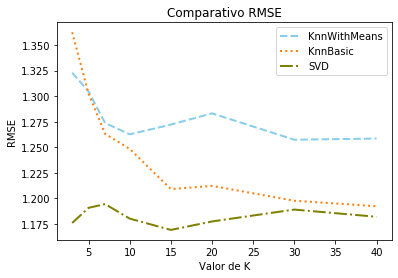

In [22]:
### Gráfico RMSE - KnnWithMeans, KnnBasic, SVD
#####################################################

df = pd.DataFrame({'k': [3, 5, 7, 10, 15, 20, 30, 40], 'knn_with_means': knn_with_means_data['test_rmse'], 
                   'knn_basic': knn_data['test_rmse'], 'svd': svd_data['test_rmse'] })

plt.plot( 'k', 'knn_with_means', data=df, linestyle='--', color='skyblue', linewidth=2, label='KnnWithMeans')
plt.plot( 'k', 'knn_basic', data=df, linestyle=':', color='C1', linewidth=2, label='KnnBasic')
plt.plot( 'k', 'svd', data=df, linestyle='-.', color='olive', linewidth=2, label='SVD')

plt.title('Comparativo RMSE')
plt.ylabel('RMSE')
plt.xlabel('Valor de K')

plt.legend()
plt.savefig(fname='comparativo_RMSE.png', format='png')

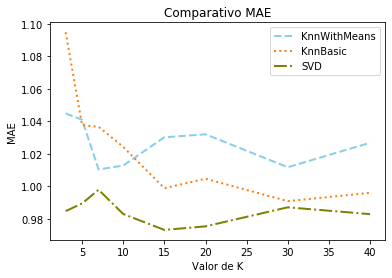

In [24]:
### Gráfico MAE - KnnWithMeans, KnnBasic, SVD
#####################################################

df = pd.DataFrame({'k': [3, 5, 7, 10, 15, 20, 30, 40], 'knn_with_means': knn_with_means_data['test_mae'], 
                   'knn_basic': knn_data['test_mae'], 'svd': svd_data['test_mae'] })

plt.plot( 'k', 'knn_with_means', data=df, linestyle='--', color='skyblue', linewidth=2, label='KnnWithMeans')
plt.plot( 'k', 'knn_basic', data=df, linestyle=':', color='C1', linewidth=2, label='KnnBasic')
plt.plot( 'k', 'svd', data=df, linestyle='-.', color='olive', linewidth=2, label='SVD')

plt.title('Comparativo MAE')
plt.ylabel('MAE')
plt.xlabel('Valor de K')

plt.legend()
plt.savefig(fname='comparativo_MAE.png', format='png')

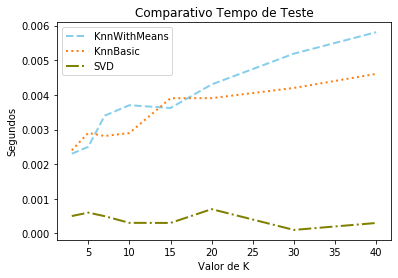

In [25]:
#####################################################
### Gráfico test_time - KnnWithMeans, KnnBasic, SVD
#####################################################

df = pd.DataFrame({'k': [3, 5, 7, 10, 15, 20, 30, 40], 'knn_with_means': knn_with_means_data['test_time'], 
                   'knn_basic': knn_data['test_time'], 'svd': svd_data['test_time'] })

plt.plot( 'k', 'knn_with_means', data=df, linestyle='--', color='skyblue', linewidth=2, label='KnnWithMeans')
plt.plot( 'k', 'knn_basic', data=df, linestyle=':', color='C1', linewidth=2, label='KnnBasic')
plt.plot( 'k', 'svd', data=df, linestyle='-.', color='olive', linewidth=2, label='SVD')

plt.title('Comparativo Tempo de Teste')
plt.ylabel('Segundos')
plt.xlabel('Valor de K')

plt.legend()
plt.savefig(fname='comparativo_test_time.png', format='png')

In [ ]:
########## Matplotlib LINKs

# https://python-graph-gallery.com/122-multiple-lines-chart/
    
# https://stackoverflow.com/questions/36184953/specifying-values-for-my-x-axis-using-the-matplotlib-pyplot
    
# https://matplotlib.org/users/pyplot_tutorial.html